In [1]:
# necessary libraries
import numpy as np
import pandas as pd

# visualiazation libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# for NLP
import spacy
import re

In [2]:
# load the spacy english model for nlp
nlp = spacy.load('en_core_web_sm')

# load the 'training' data
train_data = pd.read_csv('./data/train_E6oV3lV.csv')

# preview the data
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
def clean_tweets(tweet: str) -> list:

    """
    1. remove patterns (@user)
    2. tokenize each tweet and lemmatize.
    3. remove stop words and punctuations.
    4. return cleaned tweets.
    """
    
    pattern = r"@\w+" # @user
    pattern1 = pattern1 = r"https?://\S+"   # hyperlinks. 
    # remove patterns
    tweet_np = re.sub(pattern, '', tweet)
    tweet_np = re.sub(pattern1, '', tweet_np)
    # tokenize
    doc = nlp(tweet_np)

    # remove stopwords and punctuations and add lemma
    cleaned_tweet = [token.lemma_ for token in doc if (token.is_stop == False) and (token.is_punct == False) and (token.is_space == False)]
    # remove single characters
    final_cleaned_tweet = [word for word in cleaned_tweet if len(word) > 1]
    # join all words
    final_cleaned_tweet = ' '.join(final_cleaned_tweet)
    
    return final_cleaned_tweet

In [5]:
def extract_hash_tags(words: str) -> list:
    """Check if tweet has #tags."""
    pattern = r"#\w+"  #tags
    
    hash_tags = re.findall(pattern, words, flags=re.I)
    return hash_tags

In [6]:
def count_words(hash_tags: list) -> dict:
    """It counts the number of occurrences of words in a list and returns a dictionary countaining the counts."""
    counts = dict()
    
    for word in hash_tags:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

In [7]:
# Clean tweets
train_data['Cleaned_tweets'] = train_data['tweet'].apply(clean_tweets)

# extract hash tags
train_data['Hash_tags'] = train_data['tweet'].apply(extract_hash_tags)
train_data.head()

,id,label,tweet,Cleaned_tweets,Hash_tags
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,[#run]
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use cause offer wheelchair v...,"[#lyft, #disapointed, #getthanked]"
2,3,0,bihday your majesty,bihday majesty,[]
3,4,0,#model i love u take with u all the time in ...,model love time urð± ðððð ð ð...,[#model]
4,5,0,factsguide: society now #motivation,factsguide society motivation,[#motivation]


### Data Exploration.

In [8]:
# Word cloud of non-hate tweets
non_hate = train_data.loc[train_data['label'] == 0]
non_hate.head()

,id,label,tweet,Cleaned_tweets,Hash_tags
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,[#run]
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use cause offer wheelchair v...,"[#lyft, #disapointed, #getthanked]"
2,3,0,bihday your majesty,bihday majesty,[]
3,4,0,#model i love u take with u all the time in ...,model love time urð± ðððð ð ð...,[#model]
4,5,0,factsguide: society now #motivation,factsguide society motivation,[#motivation]


In [9]:
all_words = ' '.join([word for word in train_data['Cleaned_tweets']])

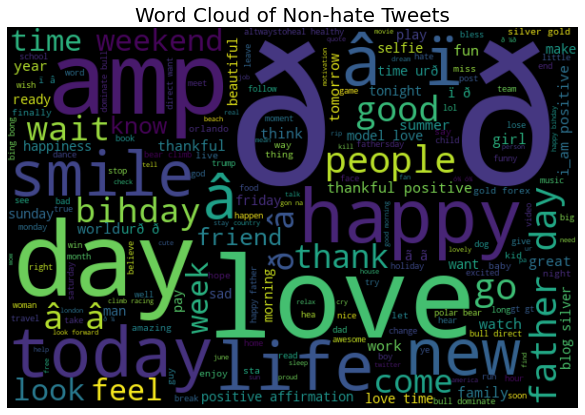

In [10]:
from wordcloud import WordCloud
non_hate_words = ' '.join([word for word in non_hate['Cleaned_tweets']])

# instatntiate
wc = WordCloud(width=600, height=400, random_state=123)
# genarate wordcloud
wc = wc.generate(non_hate_words)

# Wordcloud image
plt.figure(figsize=(12, 7))  # figure size
plt.imshow(wc, interpolation='bilinear')   # plot image
plt.title('Word Cloud of Non-hate Tweets', size=20)
plt.axis('off')   # remove axis

plt.show()       # show image

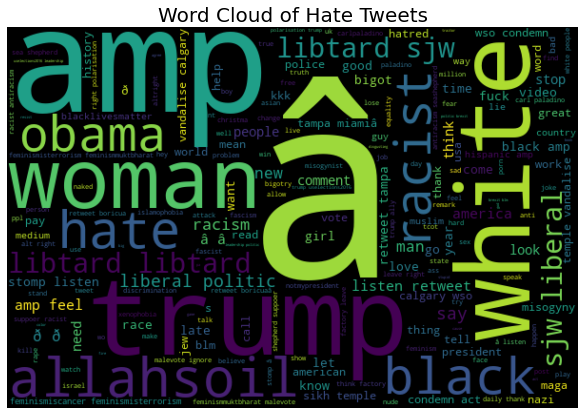

In [11]:
# Word cloud of hate tweets
hate = train_data.loc[train_data['label'] == 1]
hate_words = ' '.join([word for word in hate['Cleaned_tweets']])

# instatntiate
wc = WordCloud(width=600, height=400, random_state=123)
# genarate wordcloud
wc = wc.generate(hate_words)

# Wordcloud image
plt.figure(figsize=(12, 7))  # figure size
plt.imshow(wc, interpolation='bilinear')   # plot image
plt.title('Word Cloud of Hate Tweets', size=20)
plt.axis('off')   # remove axis

plt.show() 

In [12]:
# Count hash tags
hash_tags_list = sum(train_data['Hash_tags'], [])

hash_tags_dict = count_words(hash_tags_list)

In [13]:
# create a dataframe containing count of hashtags
hash_tags_df = pd.DataFrame(data={'Hash_tags': [*hash_tags_dict.keys()],  # hashtags
                                  'Count': [*hash_tags_dict.values()]})  # Count

hash_tags_df = hash_tags_df.sort_values(by='Count', ascending=False)
hash_tags_df.head()

,Hash_tags,Count
33,#love,1542
49,#positive,874
179,#healthy,571
231,#smile,548
48,#thankful,491


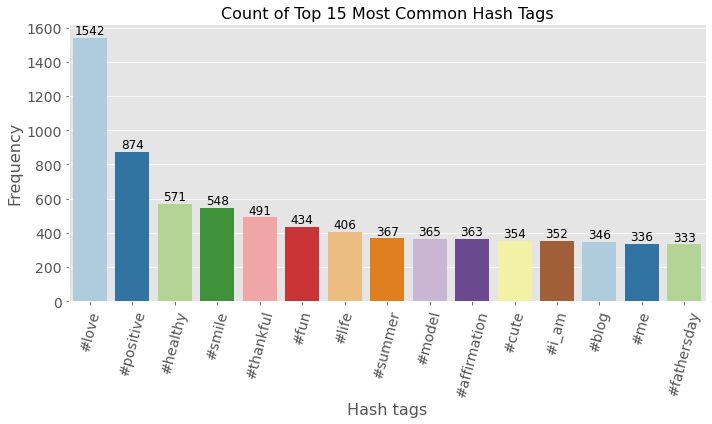

In [14]:
# barplot of the hashtags
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# 15 largest hashtags
data = hash_tags_df[:15]
sns.barplot(x='Hash_tags', y='Count', data=data, ax=ax, palette='Paired')
ax.tick_params(axis='x', labelrotation=75, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Hash tags', size=16)
ax.set_ylabel('Frequency', size=16)
ax.set_title('Count of Top 15 Most Common Hash Tags', size=16)

for bar in ax.patches:
    x_val = bar.get_x() + bar.get_width()/2
    y_val = bar.get_height()
    ax.annotate(text=f"{round(y_val)}",
                xy=(x_val, y_val), 
                xytext=(0, 7),
                ha='center',
                va='center',
                size=12,
               textcoords='offset points')

fig.tight_layout()
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [16]:
train_data.head(2)

,id,label,tweet,Cleaned_tweets,Hash_tags
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,[#run]
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use cause offer wheelchair v...,"[#lyft, #disapointed, #getthanked]"


In [17]:
X = train_data['Cleaned_tweets']
y = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
models = dict()

models['log'] = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', LogisticRegression(random_state=123))
        ])

models['mnb'] = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', MultinomialNB())
        ])

models['rf'] = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', RandomForestClassifier(n_estimators=105, n_jobs=-1, random_state=123))
        ])

models['ada'] = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', AdaBoostClassifier(n_estimators=60, random_state=123))
        ])

models['gr_bst'] = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', GradientBoostingClassifier(n_estimators=105, random_state=123))
        ])

models['svc'] = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', SVC(random_state=123))
        ])

In [19]:
for name, estimator in models.items():
    # train 
    estimator.fit(X_train, y_train)
    
    # make predictions
    y_pred = estimator.predict(X_test)
    
    # metrics
    cl_r = classification_report(y_test, y_pred)
    conf_m = confusion_matrix(y_test, y_pred)
    
    print(f"Model Name: {name} \nClassification report: \n{cl_r} \nConfusion matrix: \n{conf_m}\n")
    print("==" * 35)

Model Name: log 
Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5960
           1       0.93      0.34      0.49       433

    accuracy                           0.95      6393
   macro avg       0.94      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393
 
Confusion matrix: 
[[5949   11]
 [ 287  146]]

Model Name: mnb 
Classification report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5960
           1       0.99      0.16      0.28       433

    accuracy                           0.94      6393
   macro avg       0.96      0.58      0.62      6393
weighted avg       0.95      0.94      0.92      6393
 
Confusion matrix: 
[[5959    1]
 [ 363   70]]

Model Name: rf 
Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5960
           1       

### Tune the models

In [20]:
from sklearn.model_selection import GridSearchCV